# Graph Maker for Mid-Term Data Structures and Algorithums


Author: Joshua Roberge

In [140]:
import subprocess
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import uuid
from tqdm.notebook import tqdm


SAVE_LOCATION = "final_results.csv"
MAX_FIB = 500
MIN_FIB = 1

### Running and Gathering Results for C Implementation

In [ ]:
def get_c_fib(start:int, end:int) -> pd.DataFrame:
    """
    Runs the C implementation of Fibonacci and and then writes the results to a CSV file.
    """
    results = []
    for i in range(start, end + 1):
        # Itterative
        result = subprocess.run(['../c_fib/main.out', '-a', '1','-f', str(i)], capture_output=True, text=True)
        results.append(result.stdout.strip().split(","))

        # Dynamic
        result = subprocess.run(['../c_fib/main.out', '-a', '3','-f', str(i)], capture_output=True, text=True)
        results.append(result.stdout.strip().split(","))

        # Recusive
        if i < 40:
            result = subprocess.run(['../c_fib/main.out', '-a', '2','-f',  str(i)], capture_output=True, text=True)
            results.append(result.stdout.strip().split(","))
    
    df = pd.DataFrame(results, 
                  columns=["Fibonacci Number", "Implementation", "Time Elsaped", "Operation Count"]
                  )
    df["Fibonacci Number"] = df["Fibonacci Number"].str.replace("f_", "").astype(int)

    return df



for i in tqdm(range(1, 5), desc="Processing Fibonacci Rounds for C"):
    df = get_c_fib(MIN_FIB, MAX_FIB)
    df["Round"] = uuid.uuid4().hex ## using this as a pimrary key
    df["Language"] = "C"
    df = df[["Round", "Language", "Fibonacci Number", "Implementation", "Time Elsaped", "Operation Count"]]
    df.to_csv(SAVE_LOCATION,
              mode='a',
              index=False, 
              header=not pd.io.common.file_exists(SAVE_LOCATION))

### Running and Gathering Results for Python Implementation

In [ ]:
def get_python_fib(start:int, end:int) -> pd.DataFrame:
    """
    Runs the C implementation of Fibonacci and and then writes the results to a CSV file.
    """
    results = []
    for i in range(start, end + 1):
        # Itterative
        result = subprocess.run(['python3', '../python_fib/main.py', '-a', '1','-f', str(i)], capture_output=True, text=True)
        results.append(result.stdout.replace("\n", "").split(","))

        # Dynamic
        result = subprocess.run(['python3', '../python_fib/main.py', '-a', '3','-f', str(i)], capture_output=True, text=True)
        results.append(result.stdout.replace("\n", "").split(","))

        # Recusive
        if i < 25:
            result = subprocess.run(['python3', '../python_fib/main.py', '-a', '2','-f',  str(i)], capture_output=True, text=True)
            results.append(result.stdout.replace("\n", "").split(","))
    
    df = pd.DataFrame(results, 
                  columns=["Fibonacci Number", "Implementation", "Time Elsaped", "Operation Count"]
                  )
    df["Fibonacci Number"] = df["Fibonacci Number"].str.replace("f_", "").astype(int)

    return df


for i in tqdm(range(1, 30), desc="Processing Fibonacci Rounds for C"):
    df = get_python_fib(MIN_FIB, MAX_FIB)
    df["Round"] = uuid.uuid4().hex ## using this as a pimrary key
    df["Language"] = "Python"
    df = df[["Round", "Language", "Fibonacci Number", "Implementation", "Time Elsaped", "Operation Count"]]
    df.to_csv(SAVE_LOCATION,
              mode='a',
              index=False, 
              header=not pd.io.common.file_exists(SAVE_LOCATION))

# Make Graphs

# C - Count, Time and Ranges

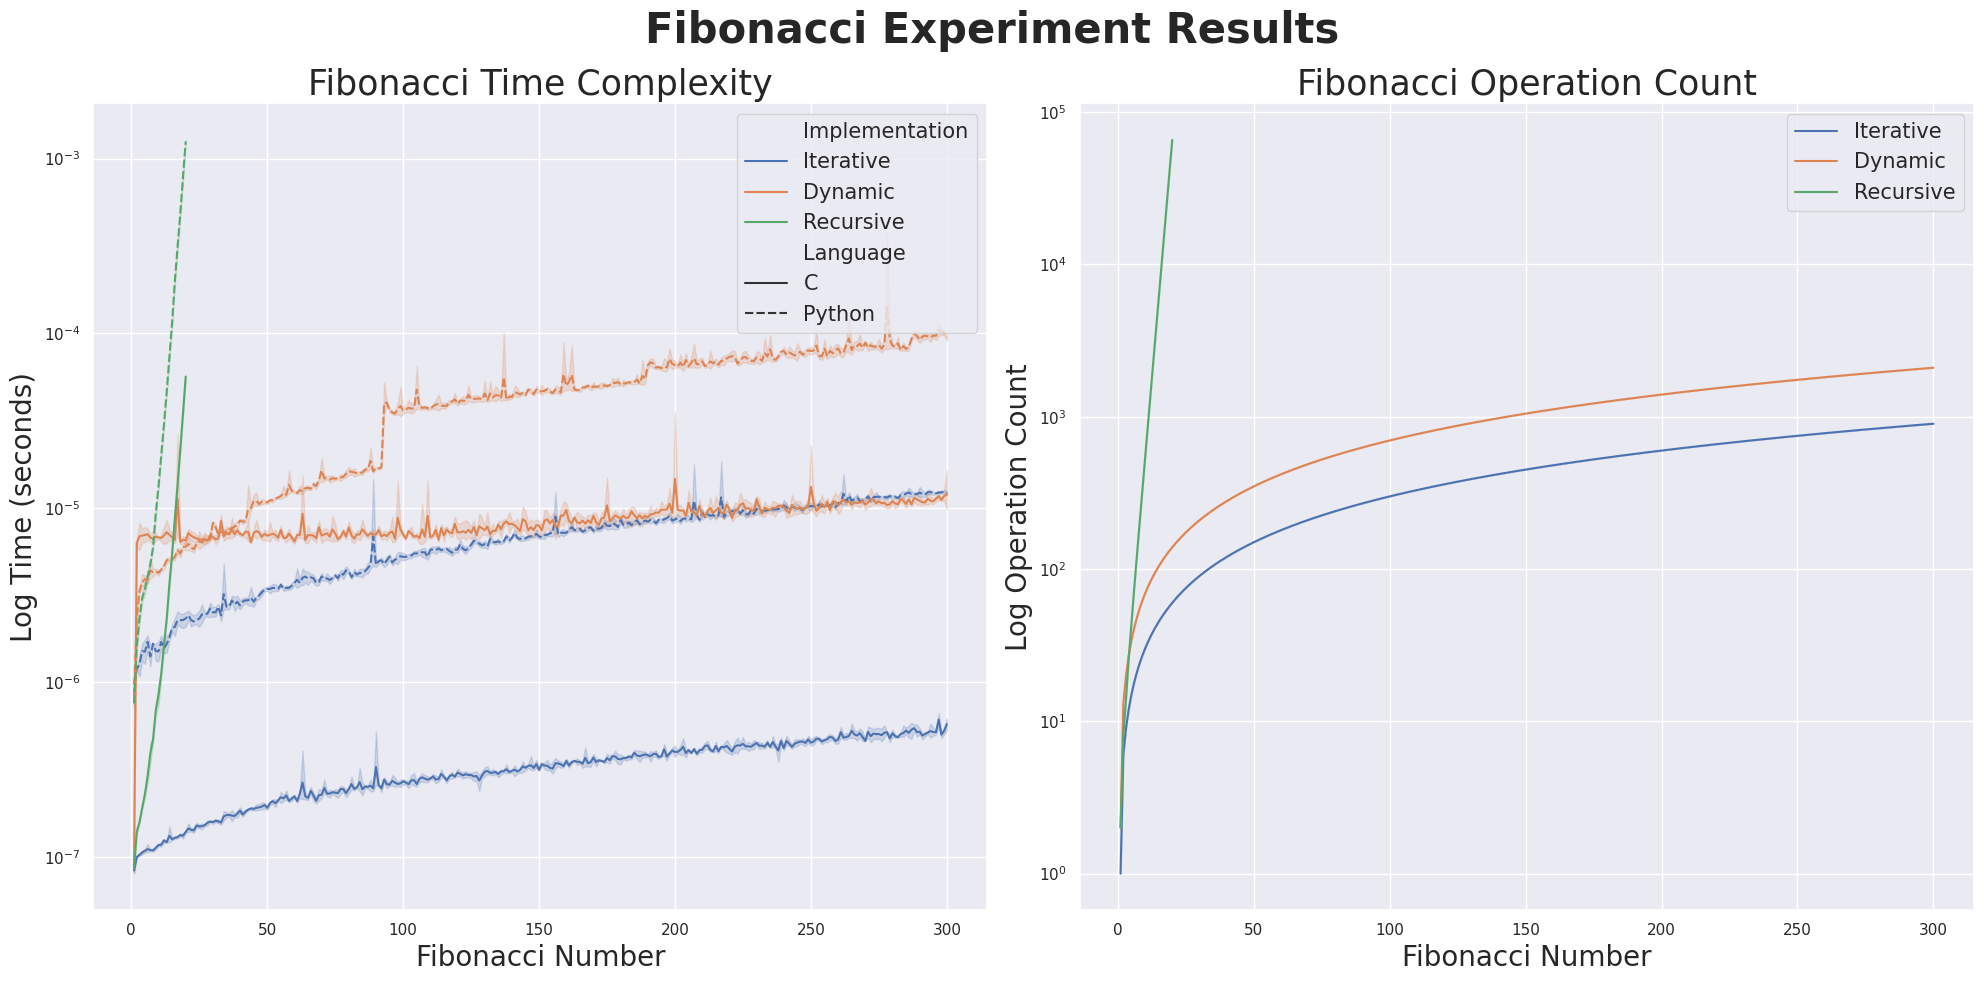

In [150]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# === Load and clean data ===
df = pd.read_csv(SAVE_LOCATION)
# df = df[df["Language"] == "C"]


# Fix column names and clean invalid values
df = df.rename(columns={"Time Elsaped": "Time (seconds)"})
df = df[(~df["Time (seconds)"].isna()) & (df["Time (seconds)"] > 0)]


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

axes[0].set_yscale('log')
axes[1].set_yscale('log')

df = df[(df["Operation Count"] < 100_000) & (df["Fibonacci Number"] <= 300)]

import seaborn as sns
sns.set_theme(style="darkgrid")



sns.lineplot(x="Fibonacci Number", y="Time (seconds)",
             hue="Implementation",
             data=df,
            ax=axes[0],
            style="Language"
            )

sns.lineplot(data=df[df["Language"] == "C"],
                x="Fibonacci Number",
                y="Operation Count",
                hue="Implementation",
                ax=axes[1])



axes[0].set_title("Fibonacci Time Complexity", fontsize=25)
axes[0].set_xlabel("Fibonacci Number", fontsize=20)
axes[0].set_ylabel("Log Time (seconds)", fontsize=20)
axes[0].legend( loc = 'upper right', fontsize=15)
axes[1].set_title("Fibonacci Operation Count", fontsize=25)
axes[1].set_xlabel("Fibonacci Number", fontsize=20)
axes[1].set_ylabel("Log Operation Count", fontsize=20)
axes[1].legend(loc = 'upper right', fontsize=15)
plt.suptitle('Fibonacci Experiment Results', fontsize=30, fontweight='bold')
plt.tight_layout()
plt.savefig("graphs/c_fib_graphs.png", dpi=300, bbox_inches='tight')




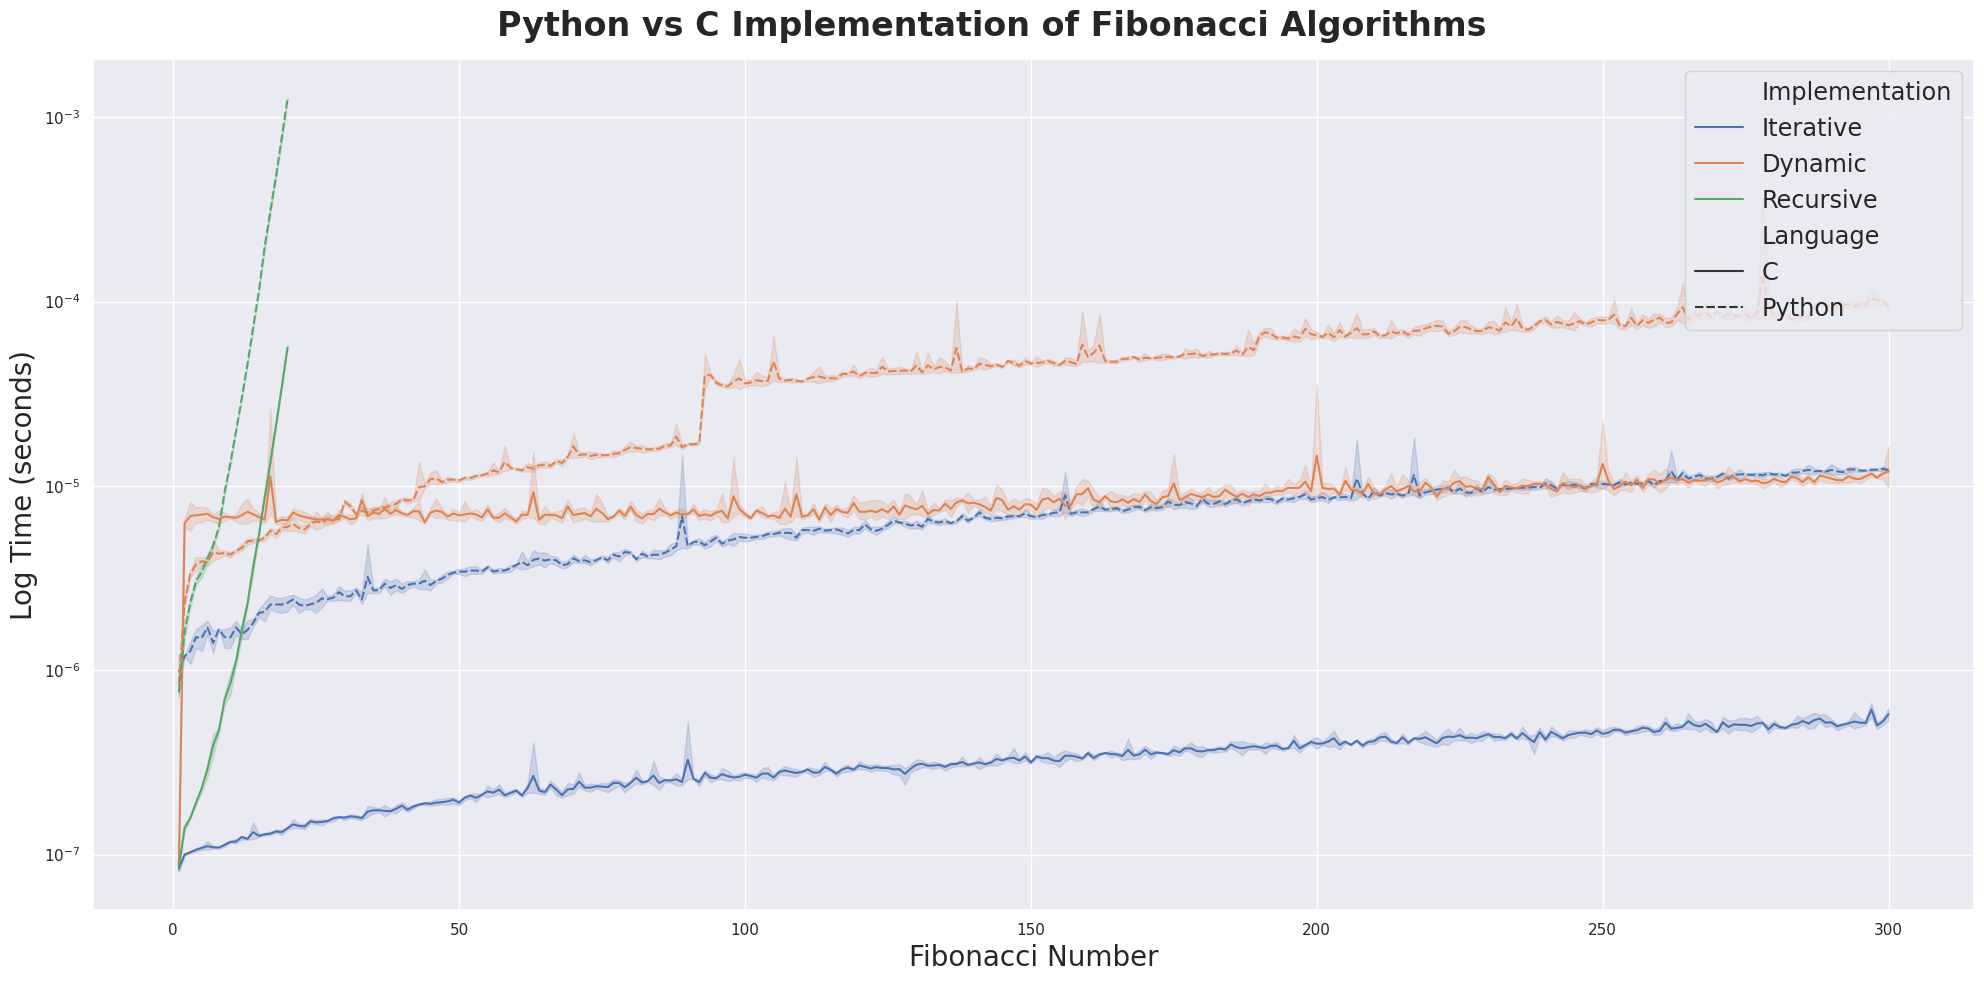

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# === Load and clean data ===
df = pd.read_csv(SAVE_LOCATION)
# df = df[df["Language"] == "C"]


# Fix column names and clean invalid values
df = df.rename(columns={"Time Elsaped": "Time (seconds)"})
df = df[(~df["Time (seconds)"].isna()) & (df["Time (seconds)"] > 0)]




fig, axe = plt.subplots(nrows=1, ncols=1, figsize=(20, 10))

axe.set_yscale('log')
axe.set_yscale('log')

df = df[(df["Operation Count"] < 100_000) & (df["Fibonacci Number"] <= 300)]

import seaborn as sns
sns.set_theme(style="darkgrid")



sns.lineplot(x="Fibonacci Number", y="Time (seconds)",
             hue="Implementation",
             data=df,
            ax=axe,
            style="Language",

             )


axe.set_xlabel("Fibonacci Number", fontsize=20)
axe.set_ylabel("Log Time (seconds)", fontsize=20)
axe.legend(fontsize='x-large', loc = 'upper right')

plt.suptitle('Python vs C Implementation of Fibonacci Algorithms', fontsize=24, fontweight='bold')
plt.savefig("graphs/python_vs_c.png", dpi=300, bbox_inches='tight')
plt.tight_layout()



In [3]:
import pandas as pd
import plotly.express as px

df = pd.read_csv(SAVE_LOCATION)
# df = df[df["Language"] == "C"]

df = df.rename(columns={"Time Elsaped": "Time (seconds)"})
df = df[(~df["Time (seconds)"].isna()) & (df["Time (seconds)"] > 0)]
df = df[(df["Operation Count"] < 100_000) & (df["Fibonacci Number"] <= 300)]

fig = px.line(
    df,
    x="Fibonacci Number",
    y="Time (seconds)",
    color="Implementation",
    line_dash="Language",  # replicates `style="Language"` in Seaborn
    log_y=True,
    title="Python vs C Implementation of Fibonacci Algorithms",
    labels={
        "Fibonacci Number": "Fibonacci Number",
        "Time (seconds)": "Log Time (seconds)"
    },
)

fig.update_layout(
    title_font=dict(size=24, family="Arial", color="white"),
    font=dict(size=16),
    legend=dict(
        title="Implementation",
        font=dict(size=14),
        bgcolor="rgba(0,0,0,0)",
        x=0.98, y=0.98,
        xanchor="right", yanchor="top"
    ),
    width=1000,
    height=600,
    margin=dict(l=60, r=40, t=80, b=60),
)

# fig.write_image("graphs/python_vs_c_plotly.png", scale=3)  # optional
fig.show()


# Experimentation with list Implementation

In [133]:
from mid_term.python_fib.fib import DynamicFib

dyFib = DynamicFib(print_debug=False)

def decompose_digits(n):
    """
    Put
    """
    B = 2**30
    limbs = []
    x = n
    while x > 0:
        limbs.append(x % B)
        x //= B
    return limbs

for n in range(80, 95):
    fib_n = dyFib.calculate(n)
    bits = fib_n.bit_length()
    dig = decompose_digits(fib_n)
    dig_str = " + ".join(f"{digit}*2^30^{i}" for i, digit in enumerate(dig))
    print(f"fib({n}) -> {bits} bits, limbs={len(dig)}")
    print(f"  Rep => {dig_str} = {fib_n}\n")





fib(80) -> 55 bits, limbs=2
  Rep => 788734437*2^30^0 + 21808527*2^30^1 = 23416728348467685

fib(81) -> 56 bits, limbs=2
  Rep => 127907170*2^30^0 + 35286939*2^30^1 = 37889062373143906

fib(82) -> 56 bits, limbs=2
  Rep => 916641607*2^30^0 + 57095466*2^30^1 = 61305790721611591

fib(83) -> 57 bits, limbs=2
  Rep => 1044548777*2^30^0 + 92382405*2^30^1 = 99194853094755497

fib(84) -> 58 bits, limbs=2
  Rep => 887448560*2^30^0 + 149477872*2^30^1 = 160500643816367088

fib(85) -> 58 bits, limbs=2
  Rep => 858255513*2^30^0 + 241860278*2^30^1 = 259695496911122585

fib(86) -> 59 bits, limbs=2
  Rep => 671962249*2^30^0 + 391338151*2^30^1 = 420196140727489673

fib(87) -> 60 bits, limbs=2
  Rep => 456475938*2^30^0 + 633198430*2^30^1 = 679891637638612258

fib(88) -> 60 bits, limbs=2
  Rep => 54696363*2^30^0 + 1024536582*2^30^1 = 1100087778366101931

fib(89) -> 61 bits, limbs=3
  Rep => 511172301*2^30^0 + 583993188*2^30^1 + 1*2^30^2 = 1779979416004714189

fib(90) -> 62 bits, limbs=3
  Rep => 5658686

In [139]:
23416728348467685
88734437*2**30**0 + 21808527*2**30



23416727737202122

In [108]:
import sys
from mid_term.python_fib.fib import DynamicFib  # or from your module
import gc

dyFib = DynamicFib(print_debug=False)

for i in range(80, 101):  # adjust range as needed
    gc.collect()
    result = dyFib.calculate(i)
    size_bytes = sys.getsizeof(result)
    bits = result.bit_length()
    print(f"fib({i:3d}) = {result}")
    print(f"  size: {size_bytes} bytes\tbit length: {bits}\n")


fib( 80) = 23416728348467685
  size: 32 bytes	bit length: 55

fib( 81) = 37889062373143906
  size: 32 bytes	bit length: 56

fib( 82) = 61305790721611591
  size: 32 bytes	bit length: 56

fib( 83) = 99194853094755497
  size: 32 bytes	bit length: 57

fib( 84) = 160500643816367088
  size: 32 bytes	bit length: 58

fib( 85) = 259695496911122585
  size: 32 bytes	bit length: 58

fib( 86) = 420196140727489673
  size: 32 bytes	bit length: 59

fib( 87) = 679891637638612258
  size: 32 bytes	bit length: 60

fib( 88) = 1100087778366101931
  size: 32 bytes	bit length: 60

fib( 89) = 1779979416004714189
  size: 36 bytes	bit length: 61

fib( 90) = 2880067194370816120
  size: 36 bytes	bit length: 62

fib( 91) = 4660046610375530309
  size: 36 bytes	bit length: 63

fib( 92) = 7540113804746346429
  size: 36 bytes	bit length: 63

fib( 93) = 12200160415121876738
  size: 36 bytes	bit length: 64

fib( 94) = 19740274219868223167
  size: 36 bytes	bit length: 65

fib( 95) = 31940434634990099905
  size: 36 bytes	b

In [113]:
import sys
import time
import pandas as pd
import gc
from mid_term.python_fib.fib import DynamicFib

dyFib = DynamicFib(print_debug=False)
records = []

for i in range(70, 101):
    start = time.time()
    result = dyFib.calculate(i)
    end = time.time()
    records.append({
        "n": i,
        "fib_size_bytes": sys.getsizeof(result),
        "bit_length": result.bit_length(),
        "time_seconds": end - start
    })
    gc.collect()

df = pd.DataFrame(records)
print(df)


      n  fib_size_bytes  bit_length  time_seconds
0    70              32          48      0.000018
1    71              32          49      0.000023
2    72              32          49      0.000024
3    73              32          50      0.000019
4    74              32          51      0.000031
5    75              32          51      0.000026
6    76              32          52      0.000024
7    77              32          53      0.000027
8    78              32          53      0.000026
9    79              32          54      0.000026
10   80              32          55      0.000026
11   81              32          56      0.000024
12   82              32          56      0.000024
13   83              32          57      0.000081
14   84              32          58      0.000087
15   85              32          58      0.000083
16   86              32          59      0.000085
17   87              32          60      0.000075
18   88              32          60      0.000092


In [116]:
from mid_term.python_fib.fib import DynamicFib
import math

fibber = DynamicFib()
for i in range(50, 100):
    val = fibber.calculate(i)
    print(f"fib({i})\tbits={val.bit_length():2d}\tlimbs={math.ceil(val.bit_length()/30)}")


fib(50)	bits=34	limbs=2
fib(51)	bits=35	limbs=2
fib(52)	bits=35	limbs=2
fib(53)	bits=36	limbs=2
fib(54)	bits=37	limbs=2
fib(55)	bits=38	limbs=2
fib(56)	bits=38	limbs=2
fib(57)	bits=39	limbs=2
fib(58)	bits=40	limbs=2
fib(59)	bits=40	limbs=2
fib(60)	bits=41	limbs=2
fib(61)	bits=42	limbs=2
fib(62)	bits=42	limbs=2
fib(63)	bits=43	limbs=2
fib(64)	bits=44	limbs=2
fib(65)	bits=44	limbs=2
fib(66)	bits=45	limbs=2
fib(67)	bits=46	limbs=2
fib(68)	bits=47	limbs=2
fib(69)	bits=47	limbs=2
fib(70)	bits=48	limbs=2
fib(71)	bits=49	limbs=2
fib(72)	bits=49	limbs=2
fib(73)	bits=50	limbs=2
fib(74)	bits=51	limbs=2
fib(75)	bits=51	limbs=2
fib(76)	bits=52	limbs=2
fib(77)	bits=53	limbs=2
fib(78)	bits=53	limbs=2
fib(79)	bits=54	limbs=2
fib(80)	bits=55	limbs=2
fib(81)	bits=56	limbs=2
fib(82)	bits=56	limbs=2
fib(83)	bits=57	limbs=2
fib(84)	bits=58	limbs=2
fib(85)	bits=58	limbs=2
fib(86)	bits=59	limbs=2
fib(87)	bits=60	limbs=2
fib(88)	bits=60	limbs=2
fib(89)	bits=61	limbs=3
fib(90)	bits=62	limbs=3
fib(91)	bits=63	

In [117]:
def limb_count(x):
    # Approximate limb count used internally (30 bits per limb on 64-bit CPython)
    return (x.bit_length() + 29) // 30

for n in range(80, 90):
    f = DynamicFib().calculate(n)
    print(f"fib({n}) limbs = {limb_count(f):2d}, bits = {f.bit_length():2d}")


fib(80) limbs =  2, bits = 55
fib(81) limbs =  2, bits = 56
fib(82) limbs =  2, bits = 56
fib(83) limbs =  2, bits = 57
fib(84) limbs =  2, bits = 58
fib(85) limbs =  2, bits = 58
fib(86) limbs =  2, bits = 59
fib(87) limbs =  2, bits = 60
fib(88) limbs =  2, bits = 60
fib(89) limbs =  3, bits = 61
